# Block Hill example model runs

This notebook configures and runs a collection of Block Hill models: versions of the Grain Hill model that include an embedded layer of blocks, represented as particles that cannot be disturbed upward, but can move downward and laterally upon disturbance, and will fall downward when undermined.

In [1]:
# Imports

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

source_dir = '/Users/gtucker/Dev/MountainFrontModel/mountain_front_model'

start_dir = os.getcwd()
os.chdir(source_dir)
import block_hill
block_hill = reload(block_hill)
os.chdir(start_dir)

In [2]:
# Function to set up a nicer colormap than the defaults
def get_block_hill_colormap():
    """Create and return a listed colormap."""
    rock = '#5F594D'
    sed = '#A4874B'
    sky = '#D0E4F2'
    mob = '#D98859'
    #block = '#777777'
    block = '#660000'
    rock = '#000000'
    clist = [sky, mob, mob, mob, mob, mob, mob, sed, sed, rock, block]
    return mpl.colors.ListedColormap(clist)

In [3]:
# Dictionary for parameters
params = {}

# Parameters
num_cols = 101
params['number_of_node_columns'] = num_cols
num_rows = int(np.round(0.5 * 0.866 * 1.0 * (num_cols - 1)))
params['number_of_node_rows'] = num_rows
params['disturbance_rate'] = 0.01
params['uplift_interval'] = 100.0
params['weathering_rate'] = 0.5e-4
params['run_duration'] = 3000.0
params['show_plots'] = False
params['plot_interval'] = 50.0
params['output_interval'] = 1.1 * params['run_duration']
params['report_interval'] = 20.0
params['settling_rate'] = 220000000.0
params['friction_coef'] = 1.0
params['rock_state_for_uplift'] = 7
params['opt_rock_collapse'] = True
dip_angle = 0.0
params['block_layer_dip_angle'] = 0.0
params['block_layer_thickness'] = 10.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
params['cmap'] = get_block_hill_colormap()
params['rock_state_for_uplift'] = 7

In [4]:
# instantiate and run a BlockHill model: first, horizontal
bh = block_hill.BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

BH__i
bh initil
GH__i
GHI
Current sim time0.0(0.0%)


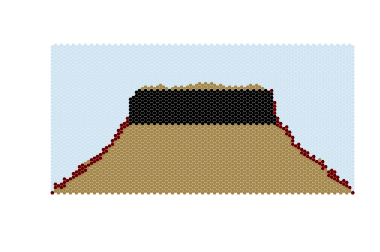

In [6]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_flat.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [11]:
# Set dip angle to 30 degrees
params['block_layer_dip_angle'] = 30.0
dip_angle = 30.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
print(params['y0_top'])
params['run_duration'] = 5000.0

# instantiate and run a BlockHill model: first, horizontal
bh = block_hill.BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

-50.4985186449
BH__i
bh initil
GH__i
GHI
Current sim time0.0(0.0%)
Current sim time1800.0(36.0%)
Current sim time2400.0(48.0%)
Current sim time3000.0(60.0%)
Current sim time3600.0(72.0%)
Current sim time4600.0(92.0%)


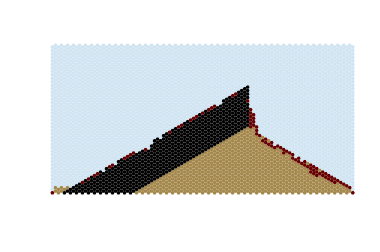

In [12]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_30deg.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [13]:
# Set dip angle to 60 degrees
params['block_layer_dip_angle'] = 60.0
dip_angle = 60.0
params['y0_top'] = -(0.866 * num_cols) * np.tan(np.pi * dip_angle / 180.0)
print(params['y0_top'])
params['run_duration'] = 7000.0

# instantiate and run a BlockHill model: first, horizontal
bh = block_hill.BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

-151.495555935
BH__i
bh initil
GH__i
GHI
Current sim time0.0(0.0%)
Current sim time1800.0(25.7142857143%)
Current sim time2400.0(34.2857142857%)
Current sim time2900.0(41.4285714286%)
Current sim time3300.0(47.1428571429%)
Current sim time3700.0(52.8571428571%)
Current sim time4100.0(58.5714285714%)
Current sim time4500.0(64.2857142857%)
Current sim time4900.0(70.0%)
Current sim time5300.0(75.7142857143%)
Current sim time5600.0(80.0%)
Current sim time5900.0(84.2857142857%)
Current sim time6200.0(88.5714285714%)
Current sim time6500.0(92.8571428571%)
Current sim time6800.0(97.1428571429%)


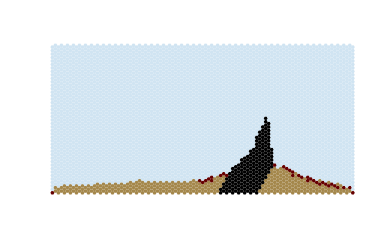

In [14]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_60deg.pdf', bbox_inches='tight', pad_inches=0, transparent=True)

In [15]:
# Set dip angle to 90 degrees
params['block_layer_dip_angle'] = 90.0
dip_angle = 90.0
params['layer_left_x'] = (0.866 * num_cols - params['block_layer_thickness']) / 2.0
params['run_duration'] = 3800.0

# instantiate and run a BlockHill model: first, horizontal
bh = block_hill.BlockHill((num_rows, num_cols), **params)

# Set lower left and right corners to block. This is for plotting: 
# ensures that the range of vals is always 0--9
bh.grid.at_node['node_state'][0] = 9
bh.grid.at_node['node_state'][num_cols // 2] = 9

# Run the model
bh.run()

BH__i
bh initil
GH__i
GHI
Current sim time0.0(0.0%)
Current sim time1600.0(42.1052631579%)
Current sim time2300.0(60.5263157895%)
Current sim time2900.0(76.3157894737%)
Current sim time3500.0(92.1052631579%)


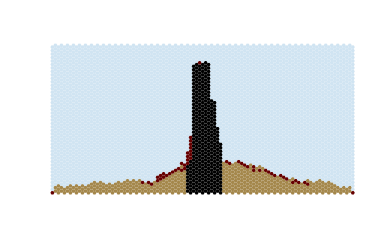

In [16]:
bh.grid.hexplot(bh.grid.at_node['node_state'], color_map=params['cmap'])
plt.axis('equal')
plt.axis('off')
plt.set_cmap(params['cmap'])
plt.savefig('block_layer_vertical.pdf', bbox_inches='tight', pad_inches=0, transparent=True)